**Project Overview**
# **Mobile Phone Price Prediction**

## **Name :Yuvashree M**
## **Internship ID: UMIP19802**


**Objective:** Build a system that predicts mobile phone pricing categories (low, medium, high, very high) based on features like battery power, RAM, processor speed, etc.


**Step 1: Import Necessary Libraries**
Libraries like pandas for data manipulation, sklearn for preprocessing, model building, and evaluation, and matplotlib and seaborn for visualization.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**Step 2: Load and Explore the Dataset**




Load the dataset and explore its structure to understand the features.

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Display basic information and summary statistics
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

**Step 3: Data Preprocessing**
Some preprocessing steps may be necessary, like scaling the features or encoding categorical data

In [3]:
# Splitting the dataset into features (X) and target (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Step 4: Model Building**


Accuracy: 89.25%


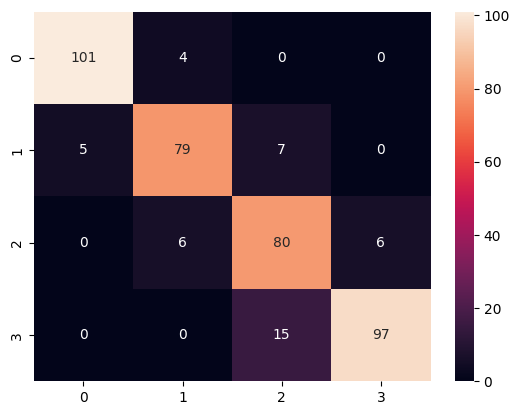

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [4]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Display confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

print(classification_report(y_test, y_pred))


**Step 5: Hyperparameter Tuning**

 Further optimize the model using techniques like GridSearchCV for hyperparameter tuning.

In [5]:
from sklearn.model_selection import GridSearchCV

# Define a grid of parameters to test
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Grid search for the best parameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Train with best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Tuned Accuracy: {accuracy_best*100:.2f}%")


Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.878125
Tuned Accuracy: 89.50%
